In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


<Axes: >

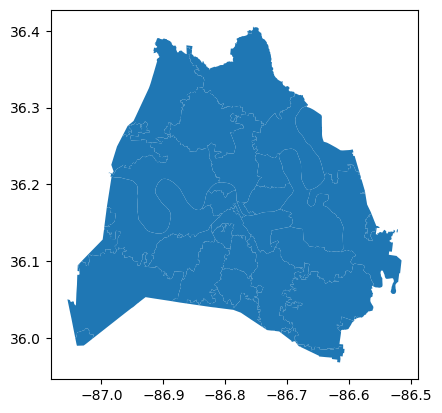

In [3]:
zipcodes.plot()

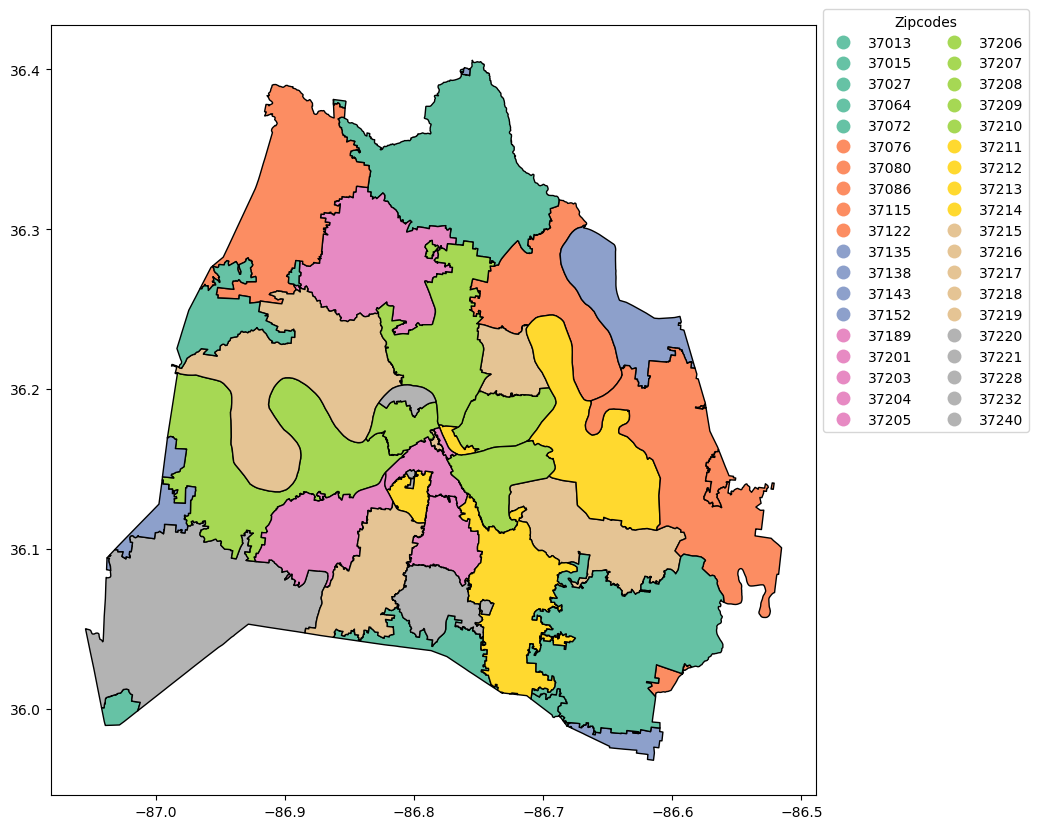

In [4]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [6]:
# zipcodes = gpd.read_file('../data/zipcodes.geojson')
# print(zipcodes.crs)
# zipcodes.head( )

sirens = gpd.read_file('../data/Tornado_Sirens.geojson')
print(sirens.crs)
sirens.head()

EPSG:4326


,city,zip,land_use_description,radius,site_name,address,siren,mounted_height,geometry
0,NASHVILLE,37201,VACANT COMMERCIAL LAND,4400,Woodland St & Gay St,0 1ST AVE N,Eclipse 8,50,POINT (-86.77698 36.16654)
1,NASHVILLE,37203,PARK OR RECREATION,14700,Watkins Park,616 17TH AVE N,508,50,POINT (-86.79982 36.16229)
2,WHITES CREEK,37189,SCHOOL OR COLLEGE,4400,Alex Green Elementary,3921 LLOYD RD,Eclipse 8,50,POINT (-86.83165 36.25259)
3,ANTIOCH,37013,STRIP SHOPPING CENTER,4400,Bell Road @ Bell Forge Rd,5432 BELL FORGE LN E,Eclipse 8,50,POINT (-86.64660 36.05049)
4,NASHVILLE,37221,SCHOOL OR COLLEGE,14700,Bellevue Middle School,655 COLICE JEANNE RD,508,50,POINT (-86.93376 36.06935)


In [26]:
#to add lat/long columns:
# df['lon'] = df.geometry.apply(lambda p: p.x)
# df['lat'] = df.geometry.apply(lambda p: p.y)

sirens['lon'] = sirens.geometry.apply(lambda p: p.x)
sirens['lat'] = sirens.geometry.apply(lambda p: p.y)
sirens

C:\Users\emily\anaconda3\envs\geospatial\lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
C:\Users\emily\anaconda3\envs\geospatial\lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


,city,zip,land_use_description,radius,site_name,address,siren,mounted_height,geometry,lon,lat
0,NASHVILLE,37201,VACANT COMMERCIAL LAND,4400,Woodland St & Gay St,0 1ST AVE N,Eclipse 8,50,POINT (-86.77698 36.16654),-86.776981,36.166543
1,NASHVILLE,37203,PARK OR RECREATION,14700,Watkins Park,616 17TH AVE N,508,50,POINT (-86.79982 36.16229),-86.799817,36.162290
2,WHITES CREEK,37189,SCHOOL OR COLLEGE,4400,Alex Green Elementary,3921 LLOYD RD,Eclipse 8,50,POINT (-86.83165 36.25259),-86.831647,36.252586
3,ANTIOCH,37013,STRIP SHOPPING CENTER,4400,Bell Road @ Bell Forge Rd,5432 BELL FORGE LN E,Eclipse 8,50,POINT (-86.64660 36.05049),-86.646603,36.050490
4,NASHVILLE,37221,SCHOOL OR COLLEGE,14700,Bellevue Middle School,655 COLICE JEANNE RD,508,50,POINT (-86.93376 36.06935),-86.933764,36.069350
...,...,...,...,...,...,...,...,...,...,...,...
108,NASHVILLE,37205,SCHOOL OR COLLEGE,4400,West End Middle School,210 ELMINGTON AVE,Eclipse 8,50,POINT (-86.82529 36.13186),-86.825294,36.131861
109,GOODLETTSVILLE,37072,VACANT COMMERCIAL LAND,14700,Conference Drive @ Vietnam Veterans,0 CONFERENCE DR,508,50,POINT (-86.69470 36.30671),-86.694702,36.306705
110,GOODLETTSVILLE,37072,"METRO OTHER THAN OFC, SCHOOL,HOSP, OR PARK",14700,Greer Rd Water Tank,1770 UNION HILL RD,508,50,POINT (-86.78553 36.33770),-86.785535,36.337699
111,NASHVILLE,37221,RIGHT OF WAY,14700,Coley Davis @ Harpeth Springs Dr.,3000 HARPETH SPRINGS DR,508,50,POINT (-86.97625 36.07344),-86.976254,36.073439


In [27]:
sirens.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   city                  113 non-null    object  
 1   zip                   111 non-null    object  
 2   land_use_description  113 non-null    object  
 3   radius                113 non-null    object  
 4   site_name             113 non-null    object  
 5   address               113 non-null    object  
 6   siren                 113 non-null    object  
 7   mounted_height        113 non-null    object  
 8   geometry              113 non-null    geometry
 9   lon                   113 non-null    float64 
 10  lat                   113 non-null    float64 
dtypes: float64(2), geometry(1), object(8)
memory usage: 9.8+ KB


<Axes: >

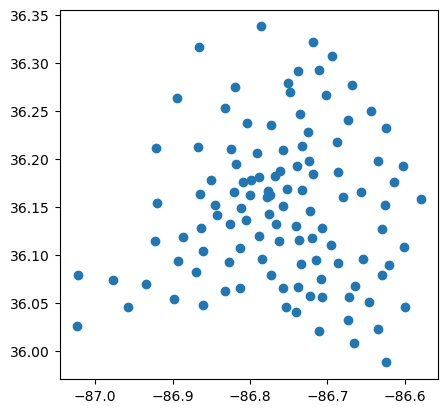

In [8]:
sirens.plot()

In [9]:
#cleaning up zip code data
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [10]:
#joining the 2 data frames
# stops_by_zip = gpd.sjoin(bus_geo, zipcodes, predicate = 'within')

sirens_map = gpd.sjoin(sirens, zipcodes, predicate = 'within')
sirens_map

,city,zip_left,land_use_description,radius,site_name,address,siren,mounted_height,geometry,index_right,zip_right,po_name
0,NASHVILLE,37201,VACANT COMMERCIAL LAND,4400,Woodland St & Gay St,0 1ST AVE N,Eclipse 8,50,POINT (-86.77698 36.16654),36,37201,NASHVILLE
1,NASHVILLE,37203,PARK OR RECREATION,14700,Watkins Park,616 17TH AVE N,508,50,POINT (-86.79982 36.16229),35,37203,NASHVILLE
2,WHITES CREEK,37189,SCHOOL OR COLLEGE,4400,Alex Green Elementary,3921 LLOYD RD,Eclipse 8,50,POINT (-86.83165 36.25259),18,37189,WHITES CREEK
3,ANTIOCH,37013,STRIP SHOPPING CENTER,4400,Bell Road @ Bell Forge Rd,5432 BELL FORGE LN E,Eclipse 8,50,POINT (-86.64660 36.05049),51,37013,ANTIOCH
4,NASHVILLE,37221,SCHOOL OR COLLEGE,14700,Bellevue Middle School,655 COLICE JEANNE RD,508,50,POINT (-86.93376 36.06935),7,37221,NASHVILLE
...,...,...,...,...,...,...,...,...,...,...,...,...
108,NASHVILLE,37205,SCHOOL OR COLLEGE,4400,West End Middle School,210 ELMINGTON AVE,Eclipse 8,50,POINT (-86.82529 36.13186),32,37205,NASHVILLE
109,GOODLETTSVILLE,37072,VACANT COMMERCIAL LAND,14700,Conference Drive @ Vietnam Veterans,0 CONFERENCE DR,508,50,POINT (-86.69470 36.30671),8,37072,GOODLETTSVILLE
110,GOODLETTSVILLE,37072,"METRO OTHER THAN OFC, SCHOOL,HOSP, OR PARK",14700,Greer Rd Water Tank,1770 UNION HILL RD,508,50,POINT (-86.78553 36.33770),8,37072,GOODLETTSVILLE
111,NASHVILLE,37221,RIGHT OF WAY,14700,Coley Davis @ Harpeth Springs Dr.,3000 HARPETH SPRINGS DR,508,50,POINT (-86.97625 36.07344),7,37221,NASHVILLE


In [13]:
sirens_map['zip_right'].value_counts()

zip_right
37013    9
37211    9
37221    7
37207    7
37214    6
37217    6
37209    5
37205    5
37203    5
37218    5
37076    4
37215    4
37115    4
37206    4
37210    4
37072    4
37138    3
37208    3
37204    3
37189    3
37216    3
37201    2
37220    2
37080    2
37027    2
37228    1
37212    1
Name: count, dtype: int64

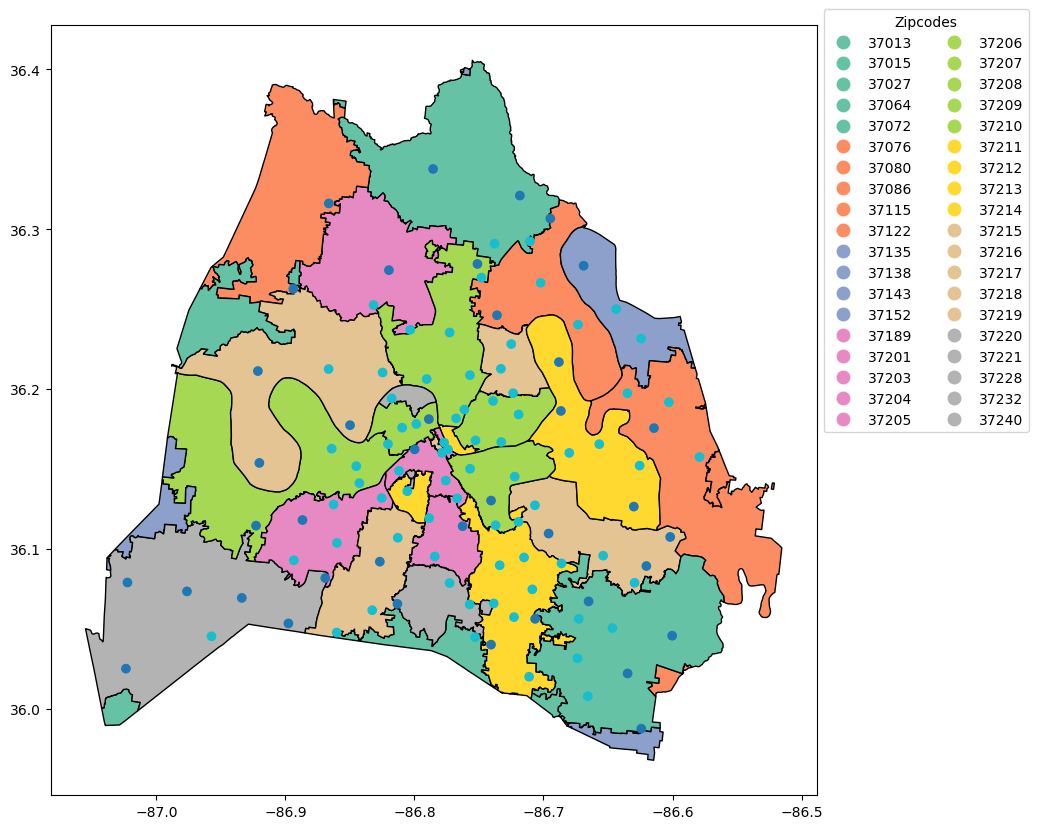

In [16]:
#plotting sirens onto zipcode map
# ax = polygon37207.plot(figsize = (8, 10), color = 'lightgreen')
# stops_in_37207.plot( ax = ax, column = 'route');
# plt.show();

ax = zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
sirens_map.plot( ax = ax, column = 'radius');
plt.show();

In [17]:
# add street map with folium

zipcodes.geometry.centroid

C:\Users\emily\AppData\Local\Temp\ipykernel_1564\2470342442.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zipcodes.geometry.centroid


0     POINT (-86.69477 36.25433)
1     POINT (-86.72635 36.21605)
2     POINT (-86.77467 36.10566)
3     POINT (-86.78551 36.04148)
4     POINT (-87.02866 36.00026)
5     POINT (-87.03712 36.08997)
6     POINT (-86.86263 36.38001)
7     POINT (-86.97531 36.06283)
8     POINT (-86.76433 36.33621)
9     POINT (-86.80157 36.13335)
10    POINT (-86.63653 35.98113)
11    POINT (-86.72226 36.00938)
12    POINT (-86.91816 36.15605)
13    POINT (-86.73098 36.18090)
14    POINT (-86.69470 36.00387)
15    POINT (-86.85733 36.37882)
16    POINT (-86.72570 36.00942)
17    POINT (-86.66093 36.10779)
18    POINT (-86.82996 36.27880)
19    POINT (-86.78726 36.28724)
20    POINT (-86.89487 36.32034)
21    POINT (-86.68513 35.99434)
22    POINT (-86.64118 36.25192)
23    POINT (-86.98674 36.15655)
24    POINT (-86.78317 36.16682)
25    POINT (-86.68331 35.99201)
26    POINT (-86.76289 36.39920)
27    POINT (-86.89039 36.20505)
28    POINT (-86.52221 36.13926)
29    POINT (-86.67866 35.98840)
30    POIN

In [19]:
center = zipcodes.geometry.centroid[0]
print(center)

POINT (-86.69476665440749 36.25432509303189)


C:\Users\emily\AppData\Local\Temp\ipykernel_1564\1031262689.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = zipcodes.geometry.centroid[0]


In [20]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.25432509303189, -86.69476665440749]


In [21]:
map_nash = folium.Map(location =  area_center, zoom_start = 14)
map_nash

In [24]:
# map_37207 = folium.Map(location =  area_center, zoom_start = 12)

# folium.GeoJson(polygon37207).add_to(map_37207)

# #iterate through stops_in_37207 to create locations and markers 
# #for each bus stop
# #remember for Folium locations, lat is listed first!!

# for row_index, row_values in stops_in_37207.iterrows():
#     loc = [row_values['lat'], row_values['lng']]
#     pop = str(row_values['route'])
#     icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
#     marker = folium.Marker(
#         location = loc,
#         popup = pop, icon = icon) 

#     marker.add_to(map_37207)
# map_37207.save('../maps/map37207.html')

# #display our map
# map_37207

map_nash = folium.Map(location =  area_center, zoom_start = 14)
folium.GeoJson(zipcodes).add_to(map_nash)

for row_index, row_values in sirens_map.iterrows():
    #loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['site_name'])
    icon = folium.Icon(color="blue",icon="exclamation-triangle", prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop, icon = icon)    
    
    marker.add_to(map_nash)
map_nash.save('../maps/map_nash.html')

#display our map
map_nash

ValueError: Expected two (lat, lon) values for location, instead got: [<POINT (-86.777 36.167)>].